# NSW Air Quality Monthly Averages 2000 - 2024 | Processing

The main tasks completed to clean and preprocess this dataset were:

**Data Cleaning**
1. Drop columns with data from irrelevant Air Quality Research Sites 
2. Drop empty columns.

**Handle Outliers**

**Handle Missing Data**
1. Drop columns with insufficient data quantity
2. Fill missing values.

**Data Normalization**
1. Restructure the table into a more useful format.
2. Change capitalization of 'suburb' data.
3. Add Local Health District data to the table.
4. Reformat date column to track only year-month.
5. Sort by date.

**Set Time Intervals**


## Set Up

Ensure that the required libraries are available by running the below code in the terminal before execution:
- pip install pandas


Execute the following in the jupyter notebook before execution to ensure that the required libraries are imported:

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np

## Load Datasets

In [70]:
df_air_quality = pd.read_excel('data-raw.xlsx')                              # Load raw Air Quality data.
df_geography = pd.read_csv('../1-nsw-geography/data-processed.csv')          # Load mapping of Air Quality Research Sites to Local Health Districts

## Exploratory Data Analysis

In [71]:
df_geography.info()             # Display information about the Geography data.
df_geography.head()             # Display the first few rows of the Geography data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   suburb  49 non-null     object
 1   lhd     49 non-null     object
dtypes: object(2)
memory usage: 916.0+ bytes


,suburb,lhd
0,Albion Park South,Murrumbidgee
1,Alexandria,Sydney
2,Bargo,South Western Sydney
3,Bathurst,Western NSW
4,Beresfield,Hunter New England


In [72]:
df_air_quality.info()           # Check data types and missing values
df_air_quality.head()           # Check first few rows of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Columns: 256 entries, Date to VINEYARD PM10 monthly average [µg/m³]
dtypes: float64(255), object(1)
memory usage: 590.1+ KB


,Date,RANDWICK SO2 monthly average [pphm],ROZELLE SO2 monthly average [pphm],LINDFIELD SO2 monthly average [pphm],LIVERPOOL SO2 monthly average [pphm],BRINGELLY SO2 monthly average [pphm],CHULLORA SO2 monthly average [pphm],WYONG SO2 monthly average [pphm],WALLSEND SO2 monthly average [pphm],CARRINGTON SO2 monthly average [pphm],...,BERESFIELD PM10 monthly average [µg/m³],TAMWORTH PM10 monthly average [µg/m³],WOLLONGONG PM10 monthly average [µg/m³],KEMBLA GRANGE PM10 monthly average [µg/m³],RICHMOND PM10 monthly average [µg/m³],BARGO PM10 monthly average [µg/m³],ALBURY PM10 monthly average [µg/m³],WAGGA WAGGA PM10 monthly average [µg/m³],ST MARYS PM10 monthly average [µg/m³],VINEYARD PM10 monthly average [µg/m³]
0,31/01/2000,0.1,NaN,0.1,NaN,0.0,NaN,NaN,0.2,NaN,...,16.8,NaN,18.3,NaN,15.3,NaN,NaN,NaN,16.9,15.5
1,29/02/2000,0.1,NaN,0.1,NaN,0.1,NaN,NaN,0.2,NaN,...,20.3,NaN,27.8,NaN,21.2,NaN,NaN,NaN,21.5,18.5
2,31/03/2000,NaN,NaN,0.1,NaN,0.0,NaN,NaN,0.2,NaN,...,17.9,NaN,21.8,NaN,15.0,NaN,NaN,NaN,15.7,14.5
3,30/04/2000,NaN,NaN,0.1,NaN,0.0,NaN,NaN,0.2,NaN,...,15.8,NaN,14.9,NaN,13.6,NaN,NaN,NaN,13.2,15.4
4,31/05/2000,NaN,NaN,0.1,NaN,0.0,NaN,NaN,0.2,NaN,...,16.9,NaN,15.7,NaN,11.4,NaN,NaN,NaN,11.6,13.7


In [73]:
df_air_quality.describe([x*0.1 for x in range(10)])   # Summary statistics

,RANDWICK SO2 monthly average [pphm],ROZELLE SO2 monthly average [pphm],LINDFIELD SO2 monthly average [pphm],LIVERPOOL SO2 monthly average [pphm],BRINGELLY SO2 monthly average [pphm],CHULLORA SO2 monthly average [pphm],WYONG SO2 monthly average [pphm],WALLSEND SO2 monthly average [pphm],CARRINGTON SO2 monthly average [pphm],STOCKTON SO2 monthly average [pphm],...,BERESFIELD PM10 monthly average [µg/m³],TAMWORTH PM10 monthly average [µg/m³],WOLLONGONG PM10 monthly average [µg/m³],KEMBLA GRANGE PM10 monthly average [µg/m³],RICHMOND PM10 monthly average [µg/m³],BARGO PM10 monthly average [µg/m³],ALBURY PM10 monthly average [µg/m³],WAGGA WAGGA PM10 monthly average [µg/m³],ST MARYS PM10 monthly average [µg/m³],VINEYARD PM10 monthly average [µg/m³]
count,280.000000,107.000000,191.000000,96.000000,283.000000,204.000000,140.00000,274.000000,121.000000,116.000000,...,283.000000,265.000000,290.000000,241.000000,291.000000,176.000000,259.000000,111.000000,283.000000,195.000000
mean,0.103571,0.061682,0.073298,0.076042,0.013074,0.079412,0.07000,0.135766,0.171074,0.233621,...,19.984099,16.843396,18.471379,19.507469,16.253608,14.519886,17.348649,24.180180,17.055477,17.031795
std,0.052753,0.048845,0.062988,0.042907,0.039573,0.045134,0.04599,0.065451,0.076853,0.175917,...,6.711216,8.748522,6.310110,6.080579,7.072400,6.281183,10.217800,10.507459,6.780144,6.111997
min,-0.100000,0.000000,-0.100000,0.000000,-0.100000,0.000000,0.00000,0.000000,0.000000,0.000000,...,11.900000,9.100000,8.700000,9.900000,5.500000,7.200000,8.000000,10.700000,7.800000,10.600000
0%,-0.100000,0.000000,-0.100000,0.000000,-0.100000,0.000000,0.00000,0.000000,0.000000,0.000000,...,11.900000,9.100000,8.700000,9.900000,5.500000,7.200000,8.000000,10.700000,7.800000,10.600000
10%,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.100000,0.100000,0.100000,...,15.100000,11.200000,11.300000,13.200000,10.500000,9.250000,10.500000,14.700000,11.040000,12.400000
20%,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.100000,0.100000,0.100000,...,15.900000,12.180000,12.840000,14.600000,12.100000,10.000000,11.500000,15.500000,12.600000,13.680000
30%,0.100000,0.000000,0.100000,0.100000,0.000000,0.100000,0.07000,0.100000,0.100000,0.100000,...,16.900000,13.200000,14.570000,16.400000,13.100000,11.450000,12.600000,17.000000,13.860000,14.400000
40%,0.100000,0.100000,0.100000,0.100000,0.000000,0.100000,0.10000,0.100000,0.200000,0.100000,...,17.800000,13.900000,16.260000,18.200000,13.900000,12.500000,13.500000,18.900000,14.900000,15.060000
50%,0.100000,0.100000,0.100000,0.100000,0.000000,0.100000,0.10000,0.100000,0.200000,0.200000,...,19.000000,15.100000,17.900000,19.200000,15.000000,13.400000,14.500000,20.800000,16.000000,16.100000


## Drop Irrelevant Data

Drop columns where the Air Quality Research Site could not be mapped to a Local Health District.

In [74]:
initial_columns = df_air_quality.shape[1]                                                                                                      # Track the number of columns before dropping.
df_air_quality = df_air_quality.drop(columns=[col for col in df_air_quality.columns if 'LIVERPOOL SWAQS' in col or 'RRPOD2' in col])           # Drop columns with unverified location data.
df_air_quality = df_air_quality.drop(columns=[col for col in df_air_quality.columns if 'ALBURY' in col])                                       # Drop columns with Albury Data (Part of a joint LHD with Victoria, outside of scope)
final_columns = df_air_quality.shape[1]                                                                                                        # Track the number of columns after dropping.
columns_dropped = initial_columns - final_columns                                                                                              # Calculate the number of columns dropped.
print(f"Number of columns dropped: {columns_dropped}")                                                                                         # Print the number of columns dropped.  

Number of columns dropped: 9


## Handle Missing Values 

- ! TODO: Fill empty columns with a 'n/a' value (or similar) instead of dropping.
- ! TODO: Current method of filling missing values results in negatives... Investigate different options.

Drop columns with no data.

In [75]:
initial_columns = df_air_quality.shape[1]                          # Track the number of columns before dropping.
df_air_quality = df_air_quality.dropna(axis=1, how='all')          # Drop columns where all elements are missing.
final_columns = df_air_quality.shape[1]                            # Track the number of columns after dropping.
columns_dropped = initial_columns - final_columns                  # Calculate the number of columns dropped.
print(f"Number of columns dropped: {columns_dropped}")             # Print the number of columns dropped.

Number of columns dropped: 18


Fill missing values.

In [76]:
imputer = IterativeImputer(random_state=0)                                                                                                             # Create an imputer object           
df_air_quality[df_air_quality.columns.difference(['Date'])] = imputer.fit_transform(df_air_quality[df_air_quality.columns.difference(['Date'])])       # Impute missing values in all columns except 'Date'
df_air_quality.head()                                                                                                                                  # Check first few rows of the data

c:\Users\matth\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Date,RANDWICK SO2 monthly average [pphm],ROZELLE SO2 monthly average [pphm],LINDFIELD SO2 monthly average [pphm],LIVERPOOL SO2 monthly average [pphm],BRINGELLY SO2 monthly average [pphm],CHULLORA SO2 monthly average [pphm],WYONG SO2 monthly average [pphm],WALLSEND SO2 monthly average [pphm],CARRINGTON SO2 monthly average [pphm],...,MAYFIELD PM10 monthly average [µg/m³],BERESFIELD PM10 monthly average [µg/m³],TAMWORTH PM10 monthly average [µg/m³],WOLLONGONG PM10 monthly average [µg/m³],KEMBLA GRANGE PM10 monthly average [µg/m³],RICHMOND PM10 monthly average [µg/m³],BARGO PM10 monthly average [µg/m³],WAGGA WAGGA PM10 monthly average [µg/m³],ST MARYS PM10 monthly average [µg/m³],VINEYARD PM10 monthly average [µg/m³]
0,31/01/2000,0.100000,0.053228,0.1,0.070056,0.0,0.067742,0.069708,0.2,0.110182,...,23.359725,16.8,14.953464,18.3,18.571620,15.3,13.616769,23.230067,16.9,15.5
1,29/02/2000,0.100000,0.071330,0.1,0.127781,0.1,0.114086,0.083058,0.2,0.182703,...,25.994739,20.3,13.587896,27.8,26.224228,21.2,18.082275,38.532430,21.5,18.5
2,31/03/2000,0.106363,0.059270,0.1,0.105214,0.0,0.102842,0.068972,0.2,0.256897,...,21.977309,17.9,12.381405,21.8,19.938578,15.0,14.302096,26.096994,15.7,14.5
3,30/04/2000,0.147075,0.053115,0.1,0.128900,0.0,0.117594,0.046052,0.2,0.361467,...,19.025137,15.8,12.988192,14.9,14.499783,13.6,10.641636,18.417089,13.2,15.4
4,31/05/2000,0.179338,0.066290,0.1,0.166099,0.0,0.139557,0.037994,0.2,0.431188,...,17.632648,16.9,13.400916,15.7,14.996035,11.4,8.835124,24.004945,11.6,13.7


## Handle Duplicates

Check for duplicated columns and drop if present.

In [77]:
initial_columns = df_air_quality.shape[1]                                               # Track the number of columns before dropping.
df_air_quality = df_air_quality.loc[:, ~df_air_quality.columns.duplicated()]            # Drop columns with duplicate column names.
final_columns = df_air_quality.shape[1]                                                 # Track the number of columns after dropping.
columns_dropped = initial_columns - final_columns                                       # Calculate the number of columns dropped.
print(f"Number of columns dropped: {columns_dropped}")                                  # Print the number of columns dropped.

Number of columns dropped: 0


Check for duplicated rows and drop if present.

In [78]:
initial_rows = df_air_quality.shape[0]                                                  # Track the number of rows before dropping
df_air_quality = df_air_quality.drop_duplicates()                                       # Drop duplicated rows
final_rows = df_air_quality.shape[0]                                                    # Track the number of rows after dropping
rows_dropped = initial_rows - final_rows                                                # Calculate the number of rows dropped
print(f"Number of rows dropped: {rows_dropped}")                                        # Print the number of rows dropped

Number of rows dropped: 0


## Handle Outliers

In [79]:
# Calculate ranges for each column (excluding 'Date')
Q1 = df_air_quality.loc[:, df_air_quality.columns != 'Date'].quantile(0.25)                                                                   # Calculate the first quartile
Q3 = df_air_quality.loc[:, df_air_quality.columns != 'Date'].quantile(0.75)                                                                   # Calculate the third quartile
IQR = Q3 - Q1                                                                                                                                 # Calculate the interquartile range
upper_bound = Q3 + 1.5 * IQR                                                                                                                  # Calculate the upper bound
lower_bound = Q1 - 1.5 * IQR                                                                                                                  # Calculate the lower bound

# Identify outliers and set them to the appropriate bound
def replace_outliers(series):
    return np.where(series > upper_bound[series.name], upper_bound[series.name],                                                              # Replace outliers above the upper bound with the upper bound
                    np.where(series < lower_bound[series.name], lower_bound[series.name], series))                                            # Replace outliers below the lower bound with the lower bound

# Set outliers to the appropriate bound in the original dataframe
df_air_quality.loc[:, df_air_quality.columns != 'Date'] = df_air_quality.loc[:, df_air_quality.columns != 'Date'].apply(replace_outliers)     # Apply the replace_outliers function to the dataframe

# Check first few rows of the data
df_air_quality.head()                                                                                                                         # Check first few rows of the data                                                               

,Date,RANDWICK SO2 monthly average [pphm],ROZELLE SO2 monthly average [pphm],LINDFIELD SO2 monthly average [pphm],LIVERPOOL SO2 monthly average [pphm],BRINGELLY SO2 monthly average [pphm],CHULLORA SO2 monthly average [pphm],WYONG SO2 monthly average [pphm],WALLSEND SO2 monthly average [pphm],CARRINGTON SO2 monthly average [pphm],...,MAYFIELD PM10 monthly average [µg/m³],BERESFIELD PM10 monthly average [µg/m³],TAMWORTH PM10 monthly average [µg/m³],WOLLONGONG PM10 monthly average [µg/m³],KEMBLA GRANGE PM10 monthly average [µg/m³],RICHMOND PM10 monthly average [µg/m³],BARGO PM10 monthly average [µg/m³],WAGGA WAGGA PM10 monthly average [µg/m³],ST MARYS PM10 monthly average [µg/m³],VINEYARD PM10 monthly average [µg/m³]
0,31/01/2000,0.1,0.053228,0.1,0.070056,0.0,0.067742,0.069708,0.2,0.110182,...,23.359725,16.8,14.953464,18.3,18.571620,15.3,13.616769,23.230067,16.9,15.5
1,29/02/2000,0.1,0.071330,0.1,0.127781,0.0,0.114086,0.083058,0.2,0.182703,...,25.994739,20.3,13.587896,27.8,26.224228,21.2,18.082275,38.532430,21.5,18.5
2,31/03/2000,0.1,0.059270,0.1,0.105214,0.0,0.102842,0.068972,0.2,0.256897,...,21.977309,17.9,12.381405,21.8,19.938578,15.0,14.302096,26.096994,15.7,14.5
3,30/04/2000,0.1,0.053115,0.1,0.128900,0.0,0.117594,0.046052,0.2,0.361467,...,19.025137,15.8,12.988192,14.9,14.499783,13.6,10.641636,18.417089,13.2,15.4
4,31/05/2000,0.1,0.066290,0.1,0.149811,0.0,0.120876,0.037994,0.2,0.430098,...,17.632648,16.9,13.400916,15.7,14.996035,11.4,8.835124,24.004945,11.6,13.7


## Data Normalization

At this stage, the table contains 232 columns representing different Air Quality Recording Sites and different Pollutants that are tracked in that column.

The purpose of this next stage is to transform the data so that each row uses the 'date' and 'recording site' as the primary key, and contains a value for each of the 6 pollutants.

In [80]:
# Melt the DataFrame to have 'suburb', 'pollutant', and 'measure' as separate columns
df_melted = df_air_quality.melt(id_vars=['Date'], var_name='variable', value_name='monthly average')                                                           # Melt the DataFrame
df_melted[['suburb', 'pollutant', 'measure']] = df_melted['variable'].str.extract(r'((?:\w+\s?){1,3}) (.+?) monthly average \[(.+?)\]')                        # Extract 'suburb', 'pollutant', and 'measure' from 'variable'
df_melted = df_melted.drop(columns=['variable'])                                                                                                               # Drop 'variable' column
df_melted = df_melted.rename(columns={'Date': 'date'})                                                                                                         # Rename 'Date' to 'date'
df_air_quality = df_melted[['date', 'suburb', 'pollutant', 'measure', 'monthly average']]                                                                      # Reassign the melted data to the original DataFrame

# Pivot the DataFrame to have 'pollutant' and 'measure' as MultiIndex columns
pollutant_measure_headers = df_air_quality.pivot_table(index=['date', 'suburb'], columns=['pollutant', 'measure'], values='monthly average')                   # Pivot the DataFrame to have 'pollutant' and 'measure' as MultiIndex columns
pollutant_measure_headers.columns = [f'{pollutant} {measure}' for pollutant, measure in pollutant_measure_headers.columns]                                     # Rename the columns to have 'pollutant' and 'measure' in the column name
df_air_quality = pollutant_measure_headers.reset_index()                                                                                                       # Reset the index of the DataFrame

# Display the restructured DataFrame
df_air_quality.head()                                                                                                                                          # Check first few rows of the data

,date,suburb,CO ppm,NO pphm,NO2 pphm,OZONE pphm,PM10 µg/m³,SO2 pphm
0,28/02/2001,ALBION PARK SOUTH,NaN,0.142245,0.424428,1.648826,NaN,0.134545
1,28/02/2001,ALEXANDRIA,-0.021939,0.771785,0.811443,1.201466,NaN,-0.113701
2,28/02/2001,BARGO,NaN,0.400000,0.500000,1.900000,16.179951,0.000000
3,28/02/2001,BATHURST,NaN,NaN,NaN,1.900000,NaN,NaN
4,28/02/2001,BERESFIELD,NaN,0.600000,0.700000,1.700000,19.200000,0.126467


Add Local Health District data to the table from the geography dataset.

In [81]:
# Prepare string data for merging.
df_air_quality['suburb'] = df_air_quality['suburb'].str.strip()                                  # Remove leading and trailing whitespaces from 'suburb' column in df_air_quality
df_air_quality['suburb'] = df_air_quality['suburb'].str.title()                                  # Capitalize the first letter of each word in 'suburb' column in df_air_quality

# Merge Datasets
df_merged = df_air_quality.merge(df_geography, on='suburb', how='left')                          # Merge df_air_quality and df_geography on 'suburb' column using a left join and store the result in df_air_quality

# Move 'lhd' column to position 3.
lhd_column = df_merged.pop('lhd')                                                                # Remove 'lhd' column from df_merged and store it in lhd_column
df_merged.insert(2, 'lhd', lhd_column)                                                           # Insert 'lhd' column back into df_merged at position 3

# Display the updated DataFrame
df_merged.head()                                                                                 # Check the first few rows of the data

,date,suburb,lhd,CO ppm,NO pphm,NO2 pphm,OZONE pphm,PM10 µg/m³,SO2 pphm
0,28/02/2001,Albion Park South,Murrumbidgee,NaN,0.142245,0.424428,1.648826,NaN,0.134545
1,28/02/2001,Alexandria,Sydney,-0.021939,0.771785,0.811443,1.201466,NaN,-0.113701
2,28/02/2001,Bargo,South Western Sydney,NaN,0.400000,0.500000,1.900000,16.179951,0.000000
3,28/02/2001,Bathurst,Western NSW,NaN,NaN,NaN,1.900000,NaN,NaN
4,28/02/2001,Beresfield,Hunter New England,NaN,0.600000,0.700000,1.700000,19.200000,0.126467


Aggregate columns based on Local Health District.

In [83]:
# Group by date and lhd and calculate the mean of each pollutant
pollutants = df_merged.columns[3:]                                                                               # Get the columns of pollutants in df_merged
df_merged = df_merged.groupby(['date', 'lhd'], as_index=False).agg({col: 'mean' for col in pollutants})          # Combine rows where 'date' and 'lhd' match by averaging th pollutant values.

# Display the updated DataFrame
df_merged.head()                                                                                                 # Check the first few rows of the data

,date,lhd,CO ppm,NO pphm,NO2 pphm,OZONE pphm,PM10 µg/m³,SO2 pphm
0,28/02/2001,Central Coast,0.156649,0.220304,0.479679,1.696986,17.702363,0.076836
1,28/02/2001,Hunter New England,0.131494,0.294281,0.518745,2.155290,22.734607,0.140282
2,28/02/2001,Illawarra Shoalhaven,0.200000,0.450000,0.750000,1.600000,23.669636,0.100000
3,28/02/2001,Mid North Coast,0.150016,0.162229,0.273570,2.037924,NaN,0.365248
4,28/02/2001,Murrumbidgee,NaN,0.223037,0.333556,1.955579,28.158253,0.134545


Reformat date so make data sortable by month.

In [84]:
# Convert the 'date' column to datetime format
df_merged['date'] = pd.to_datetime(df_merged['date'], format='%d/%m/%Y')         # Convert the 'date' column in df_merged to datetime format using the format '%d/%m/%Y'
df_merged['date'] = df_merged['date'].dt.to_period('M')                          # Extract the year and month from the 'date' column and store it back in the 'date' column
df_merged = df_merged.rename(columns={'year_month': 'date'})

# Display the updated DataFrame
df_merged.head()                                                                 # Check the first few rows of the data

,date,lhd,CO ppm,NO pphm,NO2 pphm,OZONE pphm,PM10 µg/m³,SO2 pphm
0,2001-02,Central Coast,0.156649,0.220304,0.479679,1.696986,17.702363,0.076836
1,2001-02,Hunter New England,0.131494,0.294281,0.518745,2.155290,22.734607,0.140282
2,2001-02,Illawarra Shoalhaven,0.200000,0.450000,0.750000,1.600000,23.669636,0.100000
3,2001-02,Mid North Coast,0.150016,0.162229,0.273570,2.037924,NaN,0.365248
4,2001-02,Murrumbidgee,NaN,0.223037,0.333556,1.955579,28.158253,0.134545


Sort by date.

In [85]:
df_merged = df_merged.sort_values(by=['lhd', 'date'])              # Sort the df_merged DataFrame by 'lhd' and 'date' columns
df_merged.head()                                                   # Check the first few rows of the data

,date,lhd,CO ppm,NO pphm,NO2 pphm,OZONE pphm,PM10 µg/m³,SO2 pphm
1599,2000-01,Central Coast,0.049728,0.219811,0.298046,1.391640,15.370537,0.069708
234,2000-02,Central Coast,0.086750,0.258149,0.384946,1.591839,17.366679,0.083058
1924,2000-03,Central Coast,0.118264,0.312878,0.560954,1.396280,14.892123,0.068972
325,2000-04,Central Coast,0.213126,0.585264,0.827356,1.325705,11.370653,0.046052
2249,2000-05,Central Coast,0.153237,0.722626,0.853495,1.315390,9.078634,0.037994


## Set Time Intervals

Create a new dataset with data aggregated for each financial year.

In [95]:
df_monthly = df_merged.copy()                                    # Create a copy of the merged DataFrame for the monthly data
df_financial_year = df_merged.copy()                             # Create a copy of the merged DataFrame for the financial year data

Aggregate the monthly data into financial year data.

In [96]:
# Extract year and month from the 'date' column
df_financial_year['year'] = df_financial_year['date'].dt.year                                                        # Extract year from 'date'
df_financial_year['month'] = df_financial_year['date'].dt.month                                                      # Extract month from 'date'
df_financial_year.insert(0, 'financial year', None)                                                                  # Insert a new column called 'financial year'

# Assign financial year based on month
for row in df_financial_year.itertuples():
    if row.month < 7:                                                                                                # If the month is less than 7, the financial year is the previous year and the current year
        df_financial_year.loc[row.Index, 'financial year'] = f"{row.year - 1}/{row.year}"
    else:                                                                                                            # If the month is greater than or equal to 7, the financial year is the current year and the next year
        df_financial_year.loc[row.Index, 'financial year'] = f"{row.year}/{row.year + 1}"

# Drop date and temporary columns
df_financial_year = df_financial_year.drop(columns=['date', 'year', 'month'])                                        # Drop 'date', 'year', and 'month' columns

# Aggregate the data by financial year and LHD
df_financial_year = df_financial_year.groupby(['financial year', 'lhd']).mean().reset_index()                        # Group by 'financial year' and 'lhd' and calculate the mean

# Drop first and last financial years as they are incomplete.
df_financial_year = df_financial_year[~df_financial_year['financial year'].isin(['1999/2000', '2024/2025'])]         # Drop first and last financial years

# Sort the data by 'lhd' and 'financial year'
df_financial_year = df_financial_year.sort_values(['lhd', 'financial year']).reset_index(drop=True)                  # Sort the data by 'lhd' and 'financial year'

# Display the financial year data.
df_financial_year.head()                                                                                             # Check first few rows of the data

,financial year,lhd,CO ppm,NO pphm,NO2 pphm,OZONE pphm,PM10 µg/m³,SO2 pphm
0,2000/2001,Central Coast,0.146353,0.399686,0.684942,1.702760,13.841719,0.056099
1,2001/2002,Central Coast,0.130870,0.390895,0.653007,1.747314,14.886808,0.058679
2,2002/2003,Central Coast,0.166697,0.349500,0.630578,1.838604,18.957649,0.055581
3,2003/2004,Central Coast,0.187439,0.380826,0.663296,1.831483,16.806174,0.058342
4,2004/2005,Central Coast,0.109070,0.358995,0.586031,1.775887,15.633617,0.060332


## Output Processed Dataset

In [98]:
df_monthly.to_csv('data-processed-monthly-alt.csv', index=False)                     # Save the processed monthly data to a CSV file
df_financial_year.to_csv('data-processed-financial-year-alt.csv', index=False)       # Save the processed financial year data to a CSV file

## View Dataset (Monthly)

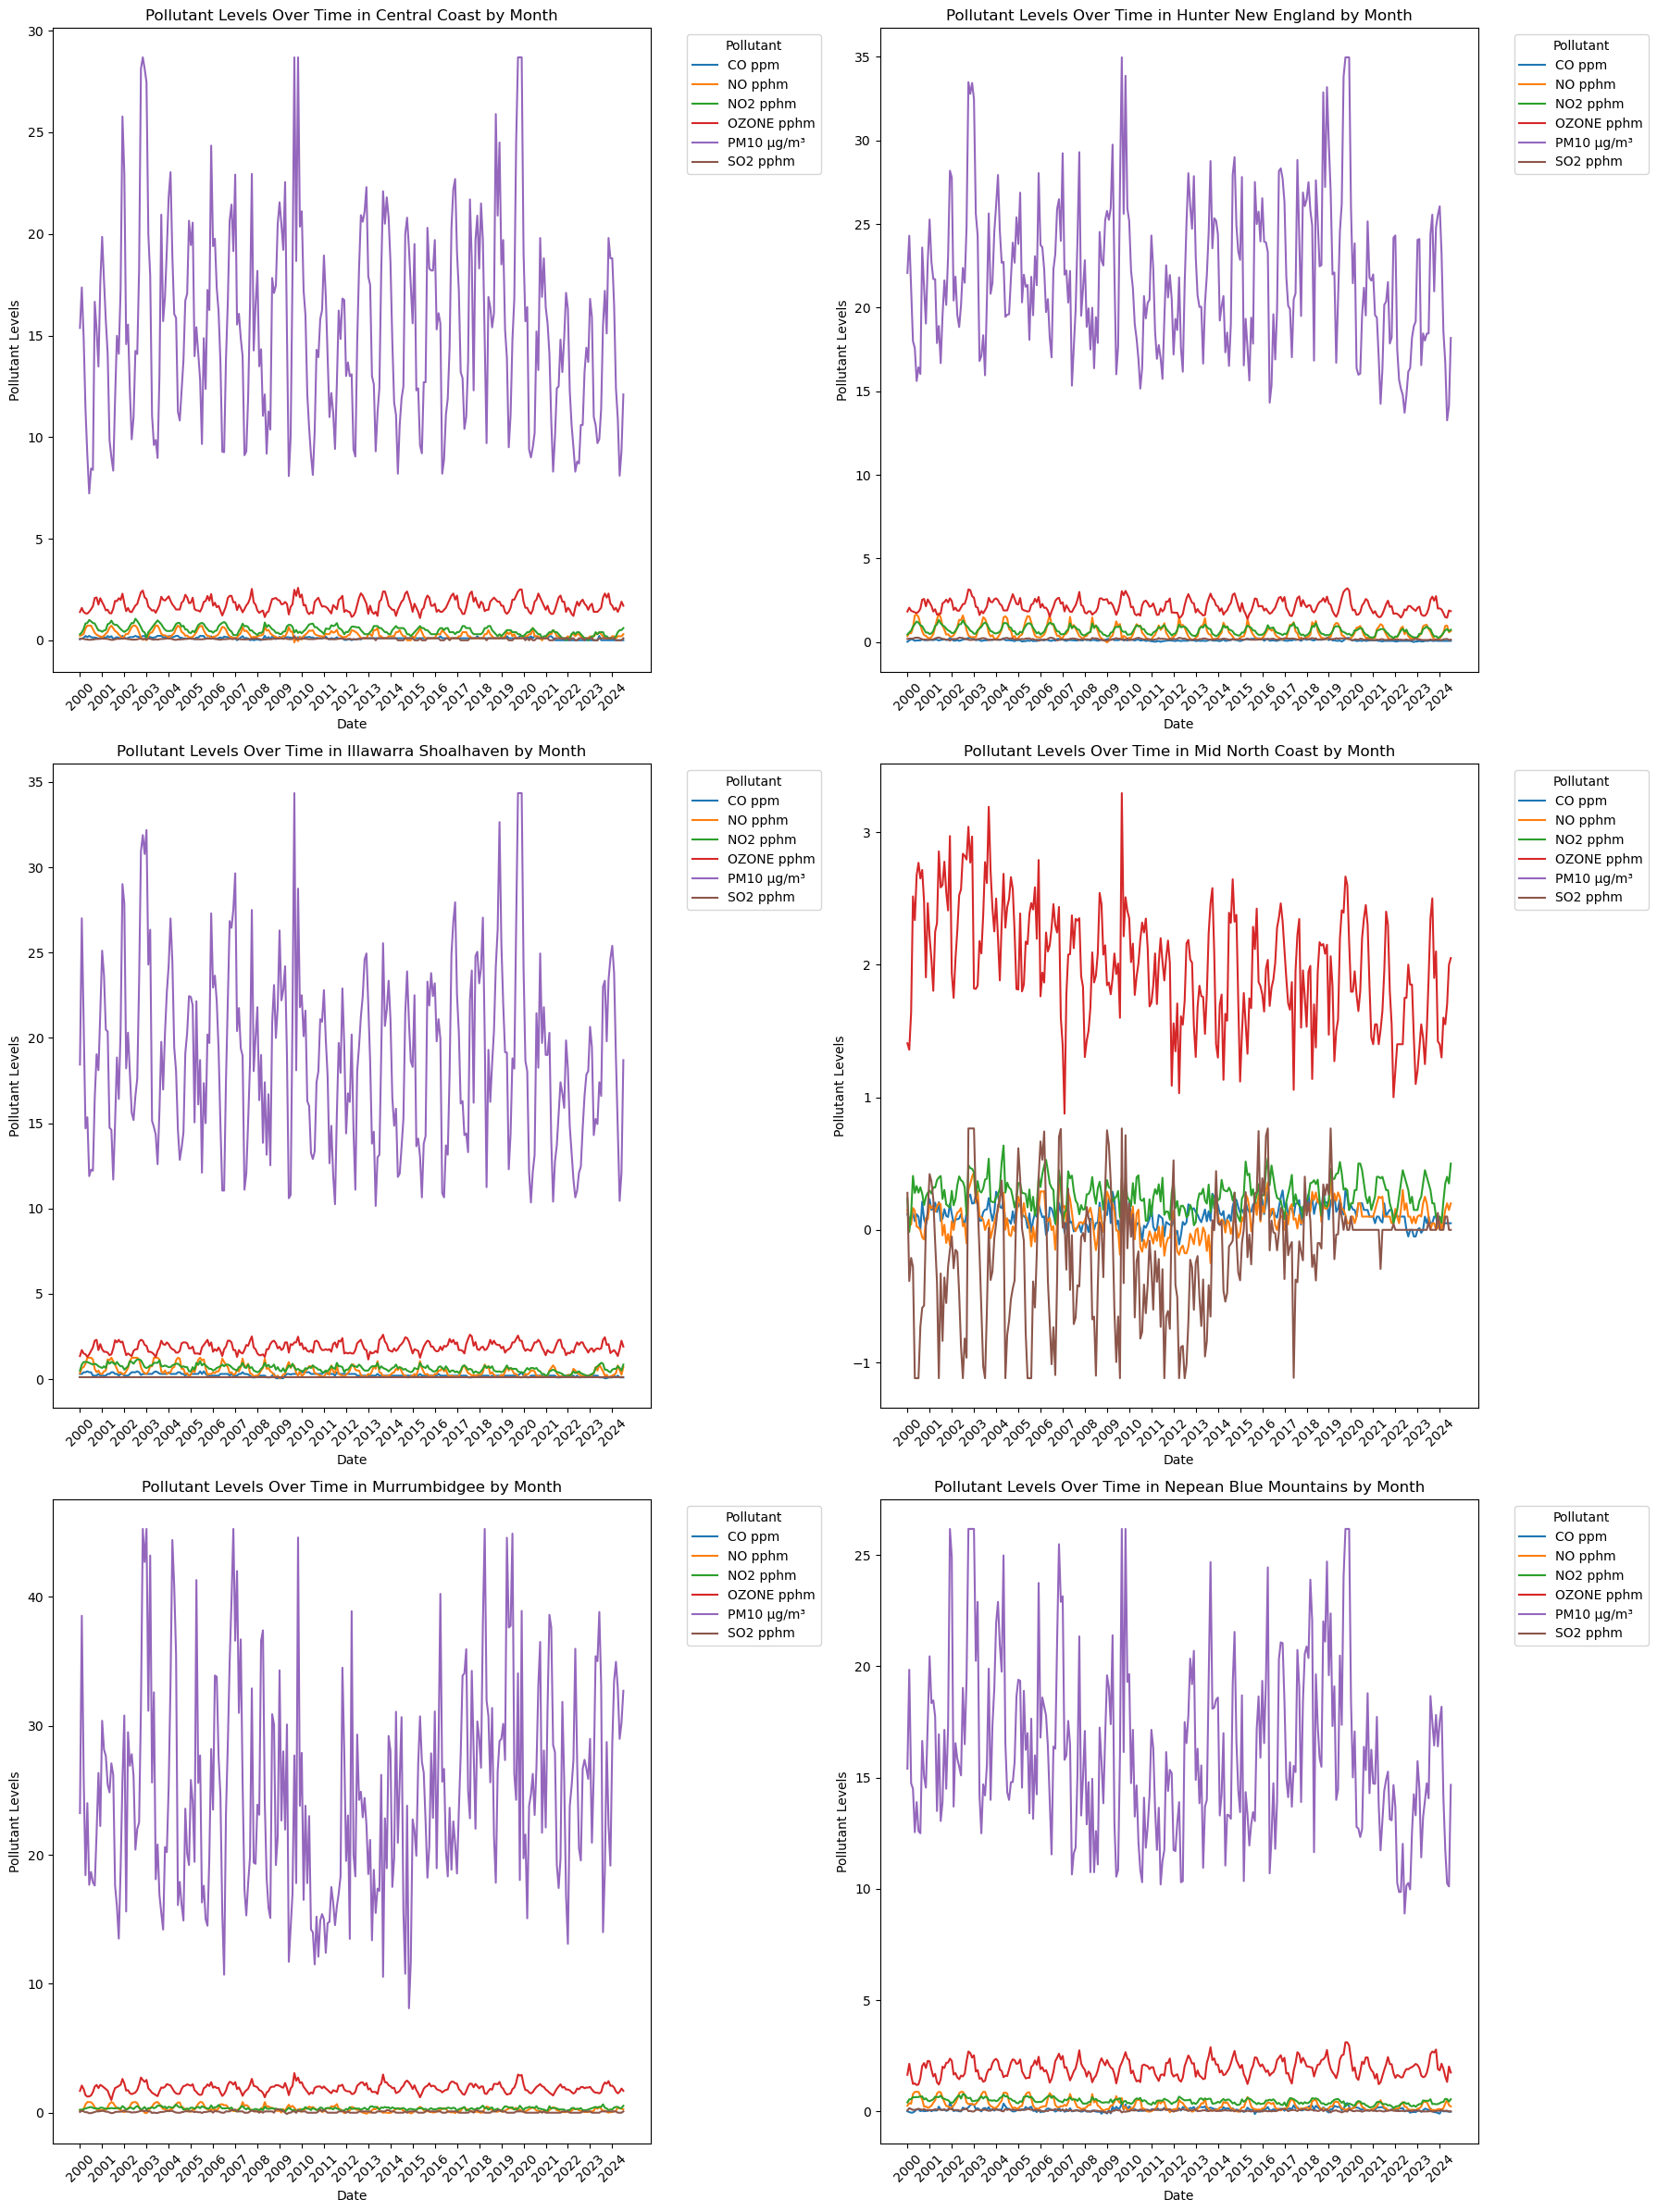

In [100]:
# Set the figure size
fig, axes = plt.subplots(3, 2, figsize=(18, 24))

# List of pollutants to plot
pollutants = ['CO ppm', 'NO pphm', 'NO2 pphm', 'OZONE pphm', 'PM10 µg/m³', 'SO2 pphm']

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each LHD
for i, lhd in enumerate(df_monthly['lhd'].unique()):
    if i >= len(axes):
        break
    ax = axes[i]
    subset = df_monthly[df_monthly['lhd'] == lhd]
    for pollutant in pollutants:
        ax.plot(subset['date'].astype(str), subset[pollutant], label=pollutant)
    
    ax.set_title(f'Pollutant Levels Over Time in {lhd} by Month')
    ax.set_xlabel('Date')
    ax.set_xticks(ticks=range(0, len(subset['date']), 12))
    ax.set_xticklabels(subset['date'].dt.year[::12], rotation=45)
    ax.set_ylabel('Pollutant Levels')
    ax.legend(title='Pollutant', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## View Dataset (Financial Year)

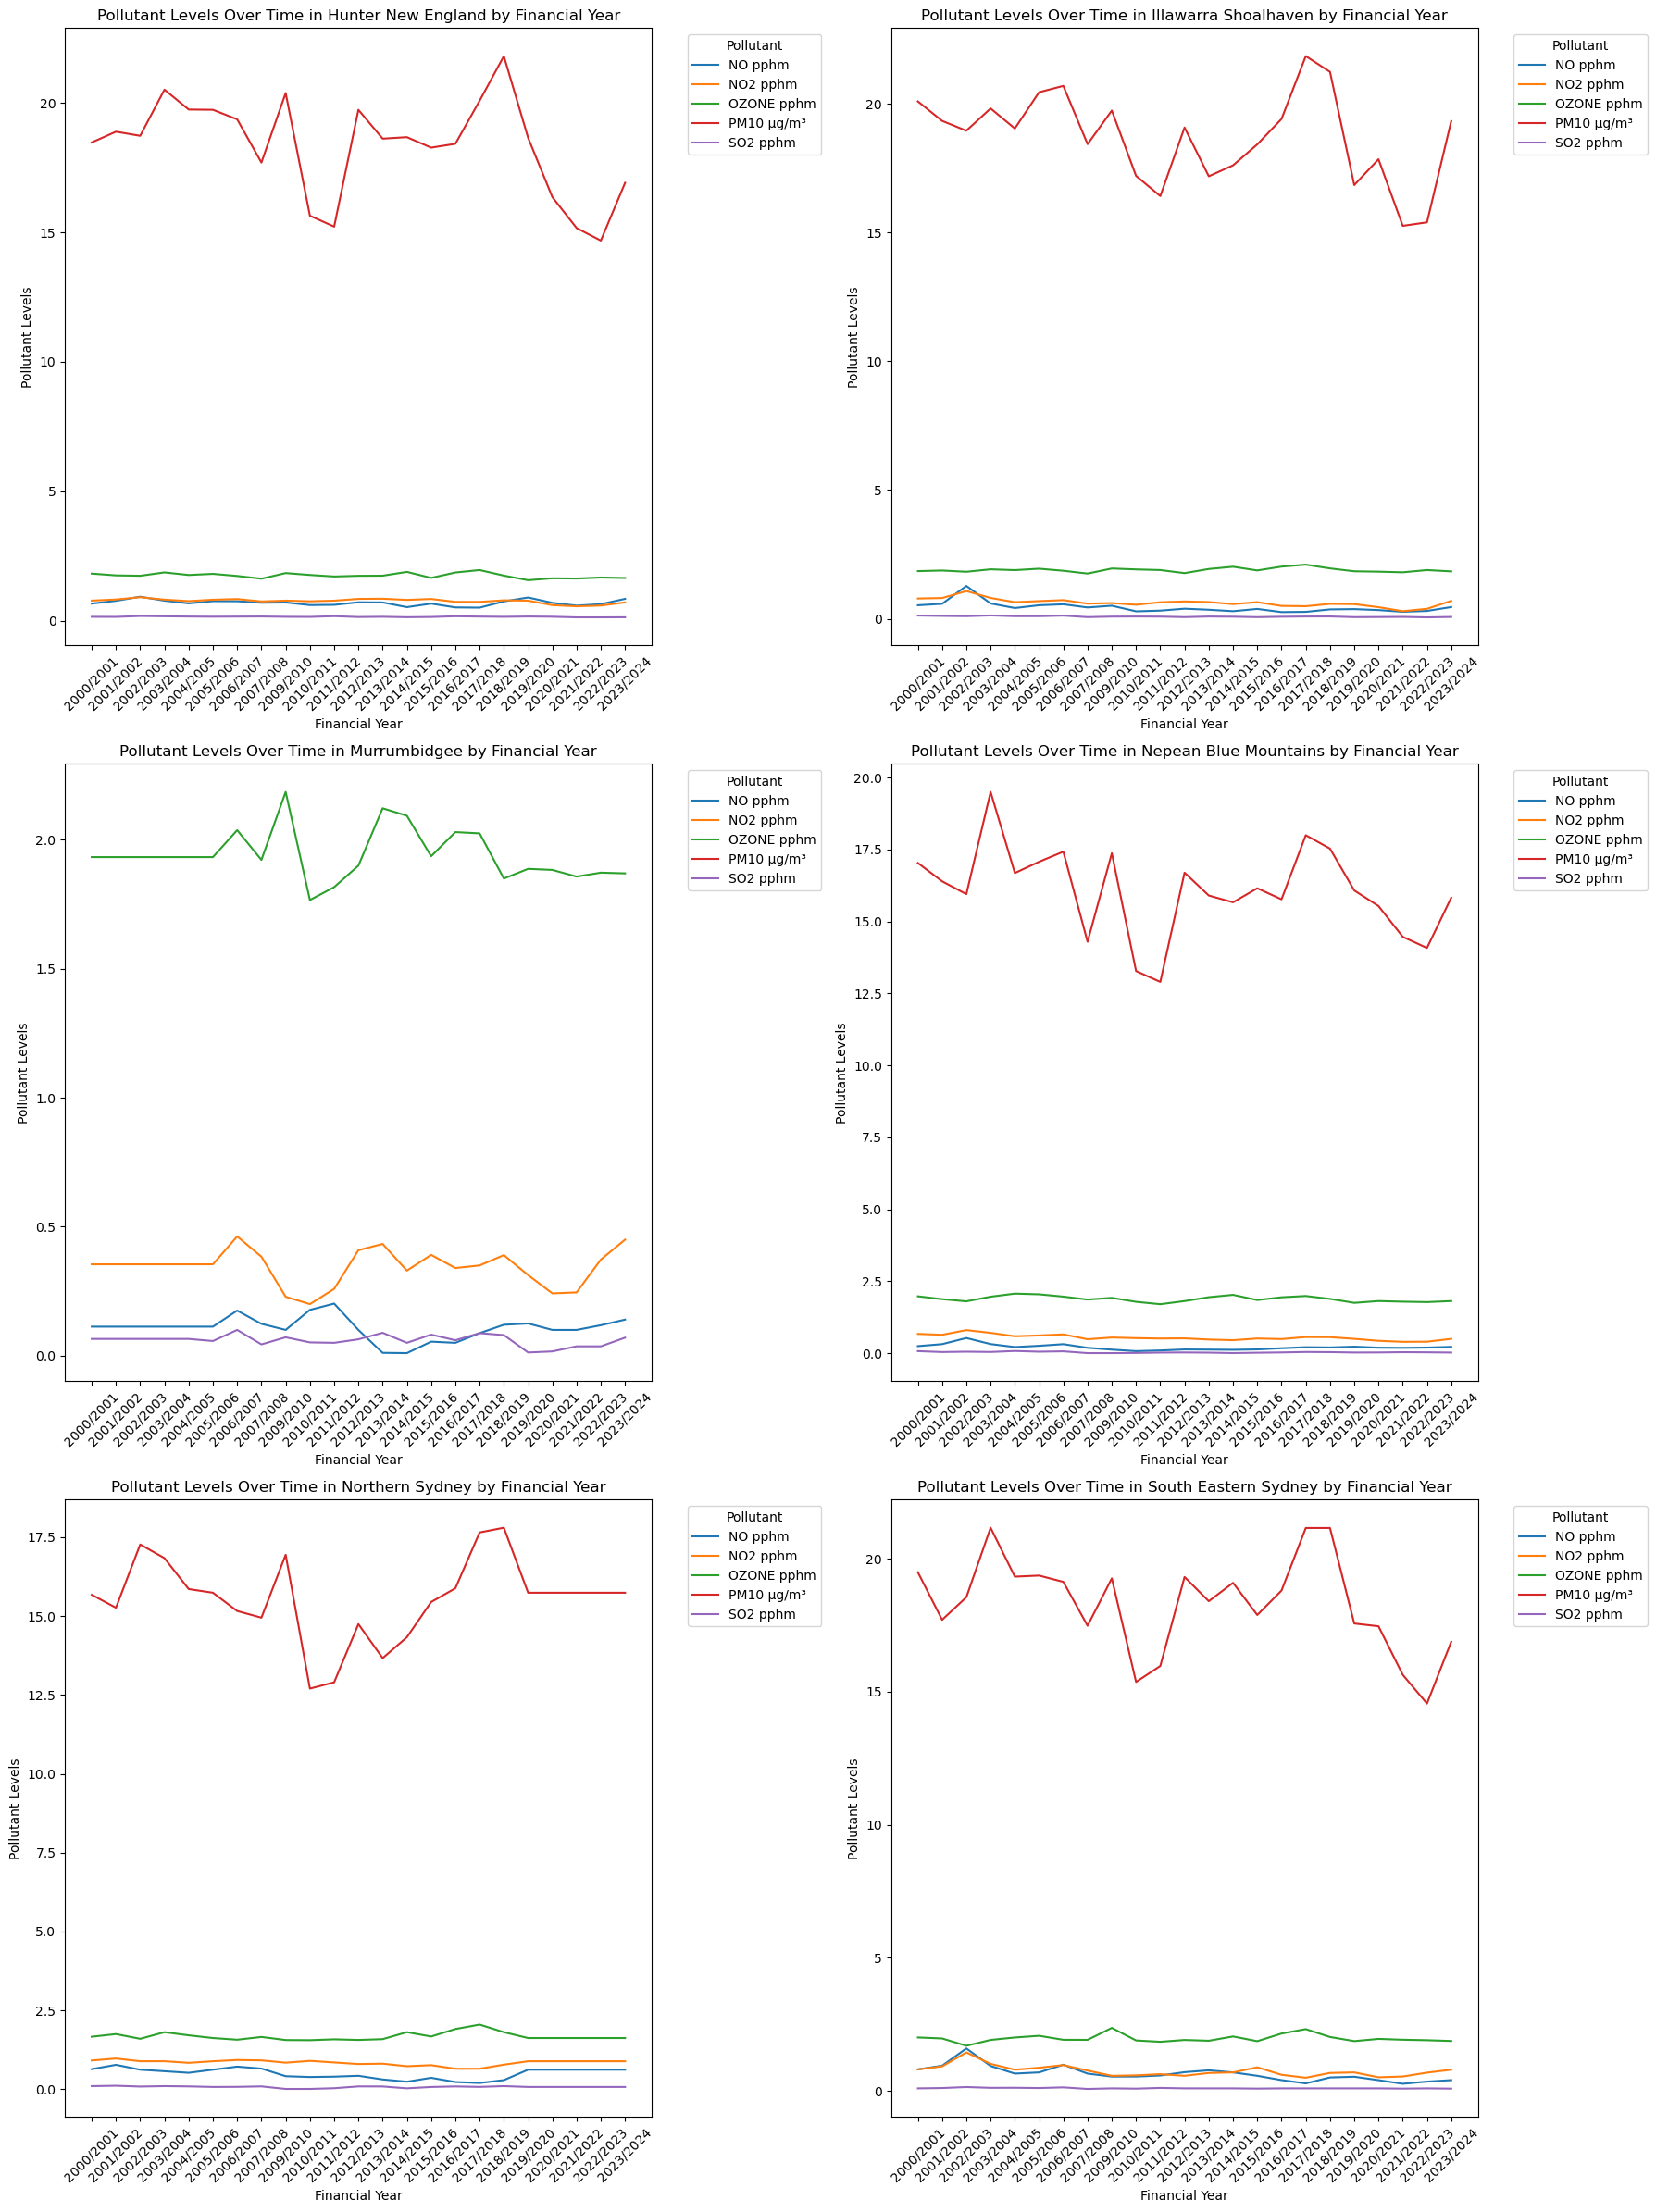

In [20]:
# Set the figure size
fig, axes = plt.subplots(3, 2, figsize=(18, 24))

# List of pollutants to plot
pollutants = ['CO ppm', 'NO pphm', 'NO2 pphm', 'OZONE pphm', 'PM10 µg/m³', 'SO2 pphm']

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each LHD
for i, lhd in enumerate(df_financial_year['lhd'].unique()):
    if i >= len(axes):
        break
    ax = axes[i]
    subset = df_financial_year[df_financial_year['lhd'] == lhd]
    for pollutant in pollutants:
        ax.plot(subset['financial year'].astype(str), subset[pollutant], label=pollutant)
    
    ax.set_title(f'Pollutant Levels Over Time in {lhd} by Financial Year')
    ax.set_xlabel('Financial Year')
    ax.set_ylabel('Pollutant Levels')
    ax.legend(title='Pollutant', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()